# Ejercicios

In [1]:
import pandas as pd
import geopandas as gpd

## Datos

### Provincias

<AxesSubplot:>

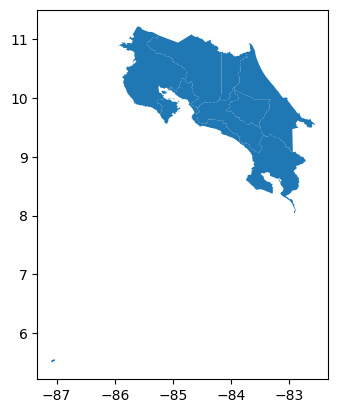

In [13]:
provincias = gpd.read_file("datos/ign/provincias.geojson")

provincias.plot()

### Cantones

<AxesSubplot:>

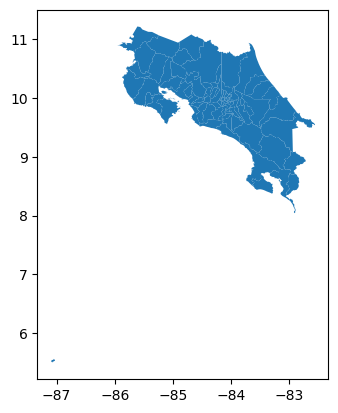

In [14]:
cantones = gpd.read_file("datos/ign/cantones.geojson")

cantones.plot()

### COVID

In [11]:
# Carga de casos positivos en cantones
covid_cantonal_positivos = pd.read_csv("datos/ministerio-salud/05_30_22_CSV_POSITIVOS.csv", 
                                       sep=";", 
                                       encoding="iso-8859-1") # para leer tildes y otros caracteres
# Reducción de columnas
covid_cantonal_positivos = covid_cantonal_positivos[["cod_provin", "cod_canton", "provincia", "canton", "30/05/2022"]]

# Eliminación de fila con valores nulos
covid_cantonal_positivos = covid_cantonal_positivos.dropna(how='all')

# Eliminación de fila con canton=="Otros"
covid_cantonal_positivos = covid_cantonal_positivos[covid_cantonal_positivos["canton"] != "Otros"]

# Cambio de nombre de columnas
covid_cantonal_positivos = covid_cantonal_positivos.rename(columns={"30/05/2022": "positivos"})


covid_cantonal_positivos

,cod_provin,cod_canton,provincia,canton,positivos
0,1.0,112.0,San José,Acosta,4104.0
1,1.0,110.0,San José,Alajuelita,18973.0
2,1.0,106.0,San José,Aserrí,10880.0
3,1.0,118.0,San José,Curridabat,14518.0
4,1.0,103.0,San José,Desamparados,43283.0
...,...,...,...,...,...
77,7.0,701.0,Limón,Limón,16822.0
78,7.0,705.0,Limón,Matina,5822.0
79,7.0,702.0,Limón,Pococí,20449.0
80,7.0,703.0,Limón,Siquirres,10349.0


In [20]:
# Casos positivos en provincias
covid_provincial_positivos = covid_cantonal_positivos.groupby("cod_provin")["positivos"].sum()

covid_provincial_positivos

cod_provin
1.0    315969.0
2.0    179754.0
3.0     92933.0
4.0    100766.0
5.0     61470.0
6.0     86938.0
7.0     66752.0
Name: positivos, dtype: float64

## Merge de cantones y COVID

In [15]:
cantones_covid = cantones.merge(covid_cantonal_positivos, on='cod_canton')

cantones_covid

,gmlid,cod_catalo,cod_canton,canton_x,ori_toponi,area,cod_provin_x,provincia_x,version,geometry,cod_provin_y,provincia_y,canton_y,positivos
0,limitecantonal_5k.1,160104,610,Corredores,Tiene su origen en el topónimo del río Corredo...,623.61,6,Puntarenas,20220622,"POLYGON ((-83.04757 8.34193, -83.04849 8.34289...",6.0,Puntarenas,Corredores,8645.0
1,limitecantonal_5k.3,160104,608,Coto Brus,De origen indígena las palabras Coto (couto) B...,944.24,6,Puntarenas,20220622,"POLYGON ((-82.93440 9.08374, -82.93423 9.08388...",6.0,Puntarenas,Coto Brus,5410.0
2,limitecantonal_5k.4,160104,605,Osa,"En recuerdo del cacique Osa, que en los inicio...",1932.70,6,Puntarenas,20220622,"POLYGON ((-83.54883 9.08223, -83.54878 9.08123...",6.0,Puntarenas,Osa,5527.0
3,limitecantonal_5k.5,160104,603,Buenos Aires,El nombre se le dio por la brisa constante que...,2382.94,6,Puntarenas,20220622,"POLYGON ((-82.97160 9.09639, -82.97174 9.09617...",6.0,Puntarenas,Buenos Aires,5348.0
4,limitecantonal_5k.6,160104,119,Pérez Zeledón,El nombre del cantón es en homenaje a don Pedr...,1901.08,1,San José,20220622,"POLYGON ((-83.76369 9.58368, -83.76323 9.58354...",1.0,San José,Pérez Zeledón,20987.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,limitecantonal_5k.80,160104,501,Liberia,El origen del nombre del cantón se remonta a 1...,1442.17,5,Guanacaste,20220622,"POLYGON ((-85.44883 10.93390, -85.44855 10.933...",5.0,Guanacaste,Liberia,12834.0
78,limitecantonal_5k.81,160104,213,Upala,Voz indígena del náhualt que significa: sobre ...,1592.67,2,Alajuela,20220622,"POLYGON ((-85.22911 11.06331, -85.22819 11.062...",2.0,Alajuela,Upala,7257.0
79,limitecantonal_5k.82,160104,510,La Cruz,Se remonta a una cruz de palos colocada a un a...,1385.40,5,Guanacaste,20220622,"POLYGON ((-85.22911 11.06331, -85.22916 11.063...",5.0,Guanacaste,La Cruz,3875.0
80,limitecantonal_5k.21,160104,601,Puntarenas,Tiene relación con el proceso geomórfico litor...,1786.90,6,Puntarenas,20220622,"MULTIPOLYGON (((-87.06792 5.50391, -87.06801 5...",6.0,Puntarenas,Puntarenas,28090.0


<AxesSubplot:>

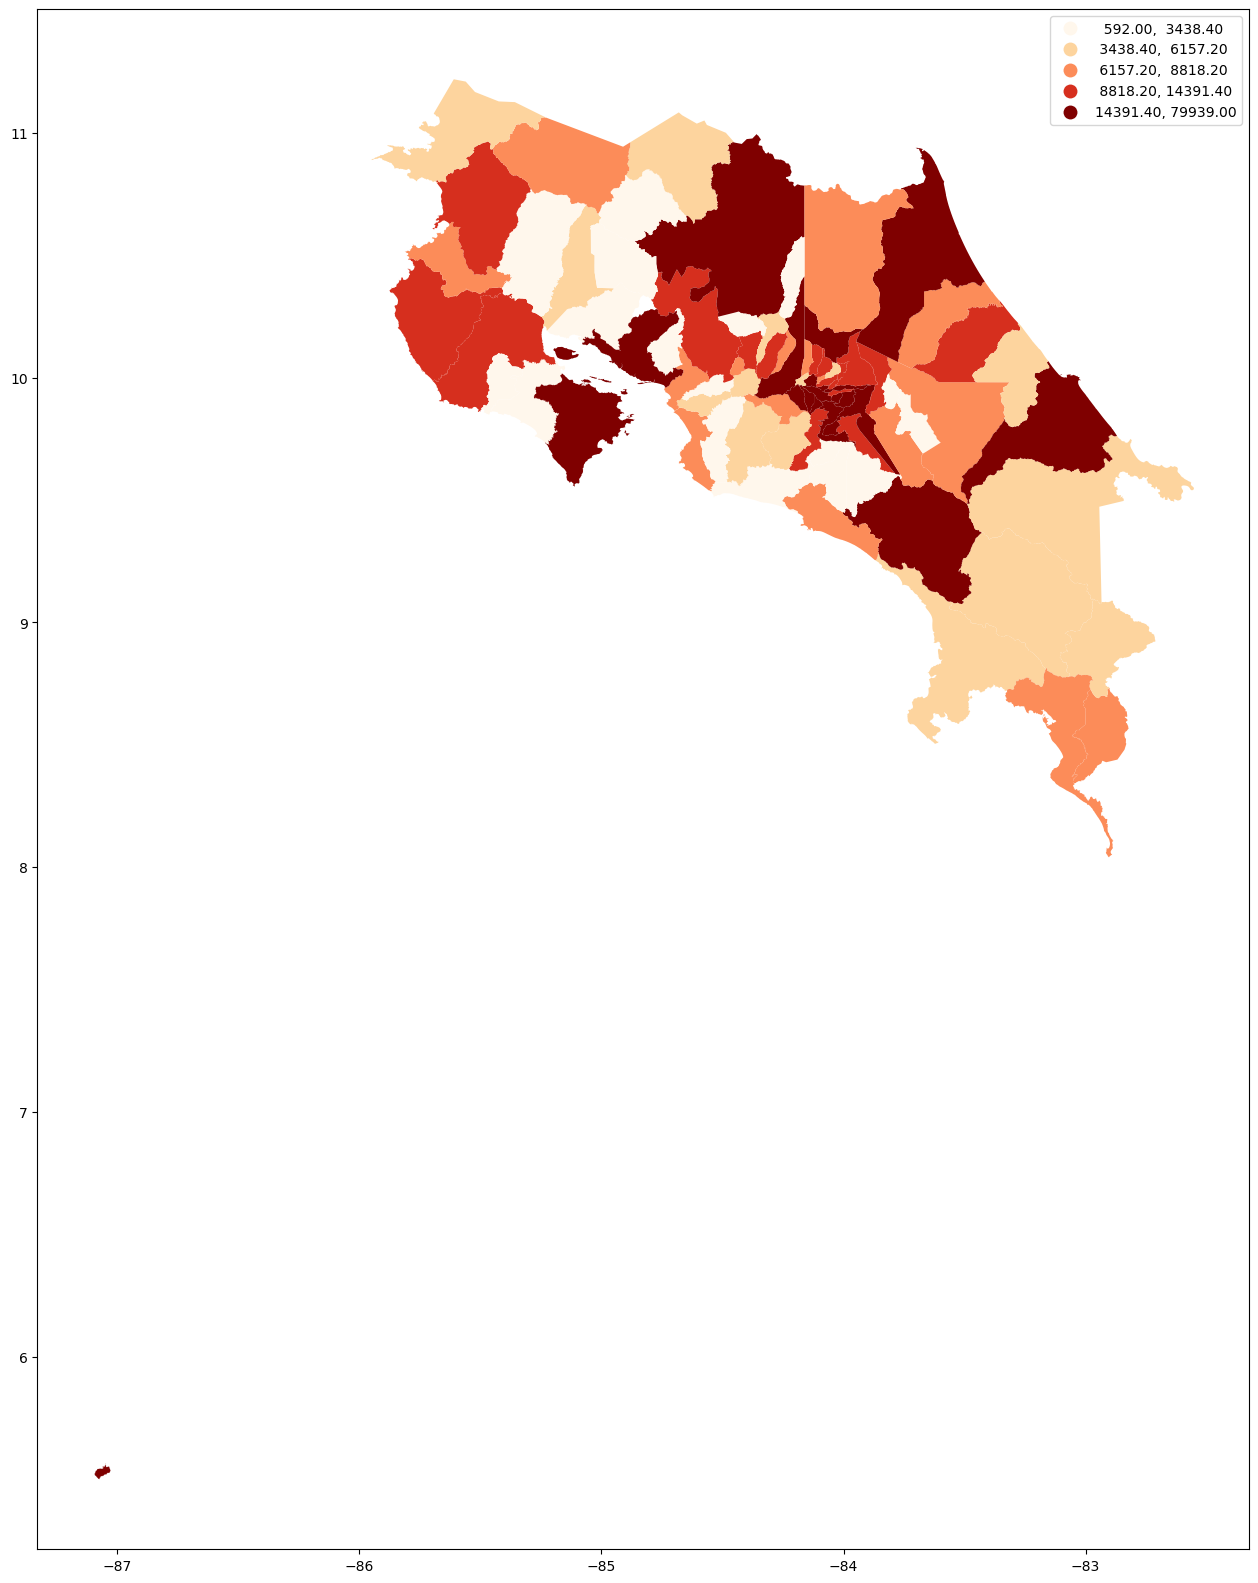

In [18]:
cantones_covid.plot(column = "positivos", 
                    legend=True,
                    cmap='OrRd', 
                    scheme='quantiles',
                    figsize=(20, 20)
                    )

## Merge de provincias y COVID

In [22]:
provincias_covid = provincias.merge(covid_provincial_positivos, on='cod_provin')

provincias_covid

,cod_catalo,cod_provin,provincia,ori_toponi,area,version,geometry,positivos
0,160103,6,Puntarenas,"En documento de 1720, se menciona la llegada d...",11298.51,20201222,"MULTIPOLYGON (((-87.06792 5.50391, -87.06801 5...",86938.0
1,160103,1,San José,Se remonta a la creación de la ermita dedicada...,4969.73,20201222,"MULTIPOLYGON (((-83.94739 10.14751, -83.94739 ...",315969.0
2,160103,7,Limón,El origen del nombre de la provincia se remont...,9176.96,20201222,"MULTIPOLYGON (((-83.70250 10.94234, -83.70221 ...",66752.0
3,160103,3,Cartago,Don Juan Vázques de Coronado escogió el sitio ...,3093.23,20201222,"MULTIPOLYGON (((-83.48864 9.48414, -83.48876 9...",92933.0
4,160103,2,Alajuela,Se remonta al paraje llamado La Lajuela que po...,9772.27,20201222,"MULTIPOLYGON (((-84.66639 11.07246, -84.60604 ...",179754.0
5,160103,5,Guanacaste,En alegoria a un frondoso árbol de Guanacaste ...,10196.32,20201222,"MULTIPOLYGON (((-85.08774 10.16580, -85.08775 ...",61470.0
6,160103,4,Heredia,En correspondiencia al Presidente de la Real ...,2663.46,20201222,"MULTIPOLYGON (((-84.02428 10.79240, -84.02427 ...",100766.0


<AxesSubplot:>

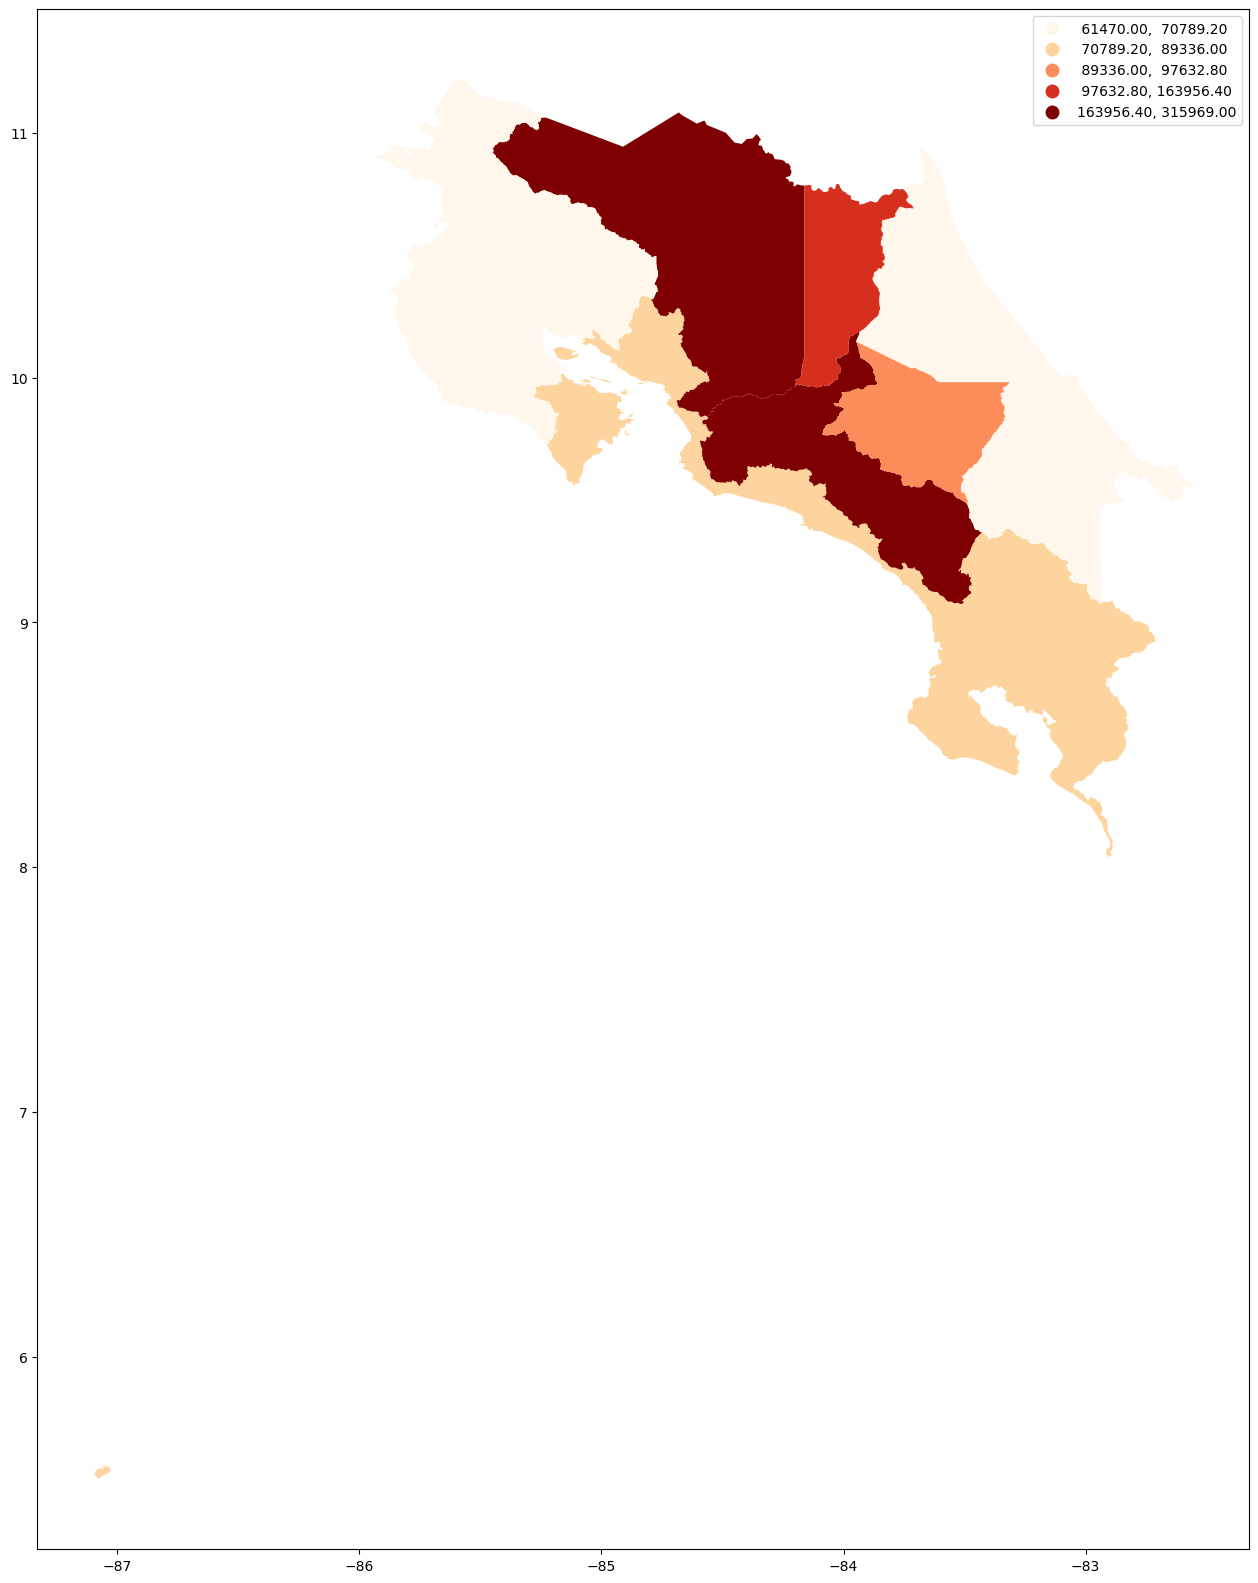

In [23]:
provincias_covid.plot(column = "positivos", 
                    legend=True,
                    cmap='OrRd', 
                    scheme='quantiles',
                    figsize=(20, 20)
                    )